1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [1]:
import pandas as pd
from vega_datasets import data
%matplotlib inline

In [2]:
temp = data.sf_temps()
temp = temp.set_index('date').sort_index()

In [3]:
temp.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
temp.resample("D").mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


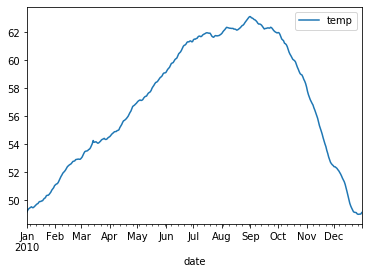

In [5]:
temp.resample("D").mean().plot()

### Write the code necessary to visualize the minimum temperature over time.

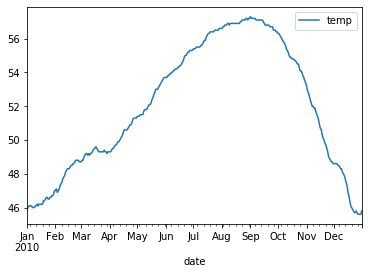

In [6]:
temp.resample("D").min().plot()

### Write the code necessary to visualize the maximum temperature over time.

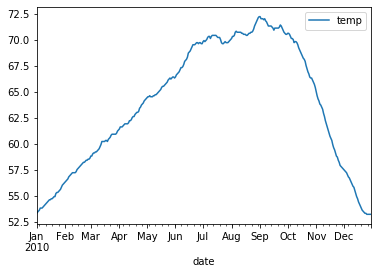

In [7]:
temp.resample("D").max().plot()

### Which month is the coldest, on average?

In [8]:
temp = data.sf_temps()
temp = temp.set_index('date').sort_index()

In [9]:
temp = temp.resample("M").mean()
temp[temp.temp == temp.temp.max()]

,temp
date,
2010-09-30,62.487083


### Which month has the highest average temperature?

In [10]:
temp = data.sf_temps()
temp = temp.set_index('date').sort_index()

In [11]:
temp = temp.resample("M").mean()
temp[temp.temp == temp.temp.min()]

,temp
date,
2010-01-31,49.98414


### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [66]:
temp = data.sf_temps()
temp = temp.set_index('date').sort_index()
temp = temp.temp.resample("D").agg(['max','min'])
temp['diff'] = temp['max'] - temp['min']
temp.head()

,max,min,diff
date,,,
2010-01-01,53.3,45.8,7.5
2010-01-02,53.4,46.0,7.4
2010-01-03,53.5,46.1,7.4
2010-01-04,53.6,46.1,7.5
2010-01-05,53.8,46.1,7.7


In [71]:
temp[temp['diff'] == temp['diff'].max()]

,max,min,diff
date,,,
2010-08-31,72.2,57.2,15.0


### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

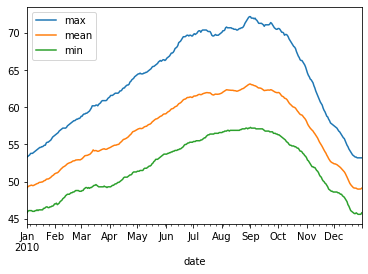

In [72]:
temp = data.sf_temps()
temp = temp.set_index('date').sort_index()
temp = temp.temp.resample("D").agg(['max','mean','min'])
temp.plot()

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

### Which year and month combination has the highest amount of precipitation?

In [74]:
df = data.seattle_weather().set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [16]:
df = df[['precipitation']].resample("M").mean()

### Visualize the amount of monthly precipitation over time.

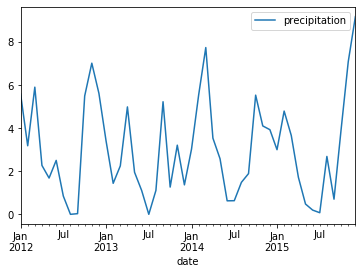

In [75]:
df[['precipitation']].resample("M").mean().plot()

In [19]:
display = df.resample('M').mean()[['precipitation']]
display.head()

,precipitation
date,
2012-01-31,5.590323
2012-02-29,3.182759
2012-03-31,5.903226
2012-04-30,2.270000
2012-05-31,1.683871


### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

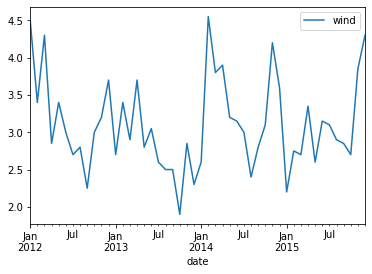

In [21]:
display = df.resample('M').median()[['wind']]
display.plot()

### Which year-month combination is the windiest?

In [88]:
df = data.seattle_weather().set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [89]:
df = df.resample("M").mean()[['wind']]
df[df['wind'] == df['wind'].max()]

,wind
date,
2014-02-28,4.528571


### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [99]:
df = data.seattle_weather().set_index('date').sort_index()
df = df[df.weather == 'sun']
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-11,0.0,6.1,-1.1,5.1,sun
2012-01-12,0.0,6.1,-1.7,1.9,sun
2012-01-13,0.0,5.0,-2.8,1.3,sun
2012-02-02,0.0,8.3,1.7,2.6,sun


In [100]:
df = df.resample('Y').count()[['weather']]
df[df.weather == df.weather.max()]

,weather
date,
2014-12-31,211


### In which month does it rain the most?

In [105]:
df = data.seattle_weather().set_index('date').sort_index()
df = df[df.weather == 'rain']
df = df.resample('M').count()[['weather']]
df[df.weather == df.weather.max()]

,weather
date,
2012-11-30,25


### Which month has the most number of days with a non-zero amount of precipitation?

In [106]:
df = data.seattle_weather().set_index('date').sort_index()
df = df[df.precipitation > 0]
df = df.resample('M').count()[['precipitation']]
df[df.precipitation == df.precipitation.max()]

,precipitation
date,
2012-12-31,27
